Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.


# Simple linear regression: Problem solving

For this session, we will use a new dataset, `trees`, that contains the following data for 31 cherry trees:

| Variable | Type  | Description                                           |
|----------|-------|:-------------------------------------------------------|
| Girth    | Ratio | Tree diameter (rather than girth, actually) in inches |
| Height   | Ratio | Height in ft                                          |
| Volume   | Ratio | Volume of timber in cubic ft                          |

Our main question is whether `Height` can be used to predict `Volume`.

## Load the data

Start by loading `readr` and `dplyr`.

In [1]:
library(readr)
library(dplyr)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




And load the dataframe, displaying it to make sure it looks right.

In [2]:
dataframe = readr::read_csv("datasets/trees.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="28" y="220"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/trees.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="8" y="304"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 31 Columns: 3
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
dbl (3): Girth, Height, Volume

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Girth,Height,Volume
<dbl>,<dbl>,<dbl>
8.3,70,10.3
8.6,65,10.3
8.8,63,10.2
10.5,72,16.4
10.7,81,18.8
⋮,⋮,⋮
17.5,82,55.7
17.9,80,58.3
18.0,80,51.5


## Describe and visualize

Load `base` and `ggplot2`.

In [3]:
library(base)
library(ggplot2)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable></variables><block type="import_R" id="*VxvMC/-.UEwASPz(/;T" x="-140" y="10"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field><next><block type="import_R" id="n?whQI8t]Qj6)k-ny|GN"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”


Print out the descriptive statistics.

In [4]:
base::summary(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="6C!l+@S8,SvtzakmsxQD">base</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="9mt[*fvBjIq5]rmBih{h" x="-132" y="152"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data><value name="ADD0"><block type="variables_get" id="Ec=vl|)gc7PAT-X_uPi~"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

     Girth           Height       Volume     
 Min.   : 8.30   Min.   :63   Min.   :10.20  
 1st Qu.:11.05   1st Qu.:72   1st Qu.:19.40  
 Median :12.90   Median :76   Median :24.20  
 Mean   :13.25   Mean   :76   Mean   :30.17  
 3rd Qu.:15.25   3rd Qu.:80   3rd Qu.:37.30  
 Max.   :20.60   Max.   :87   Max.   :77.00  

Plot the relationship between `Height` and `Volume`.


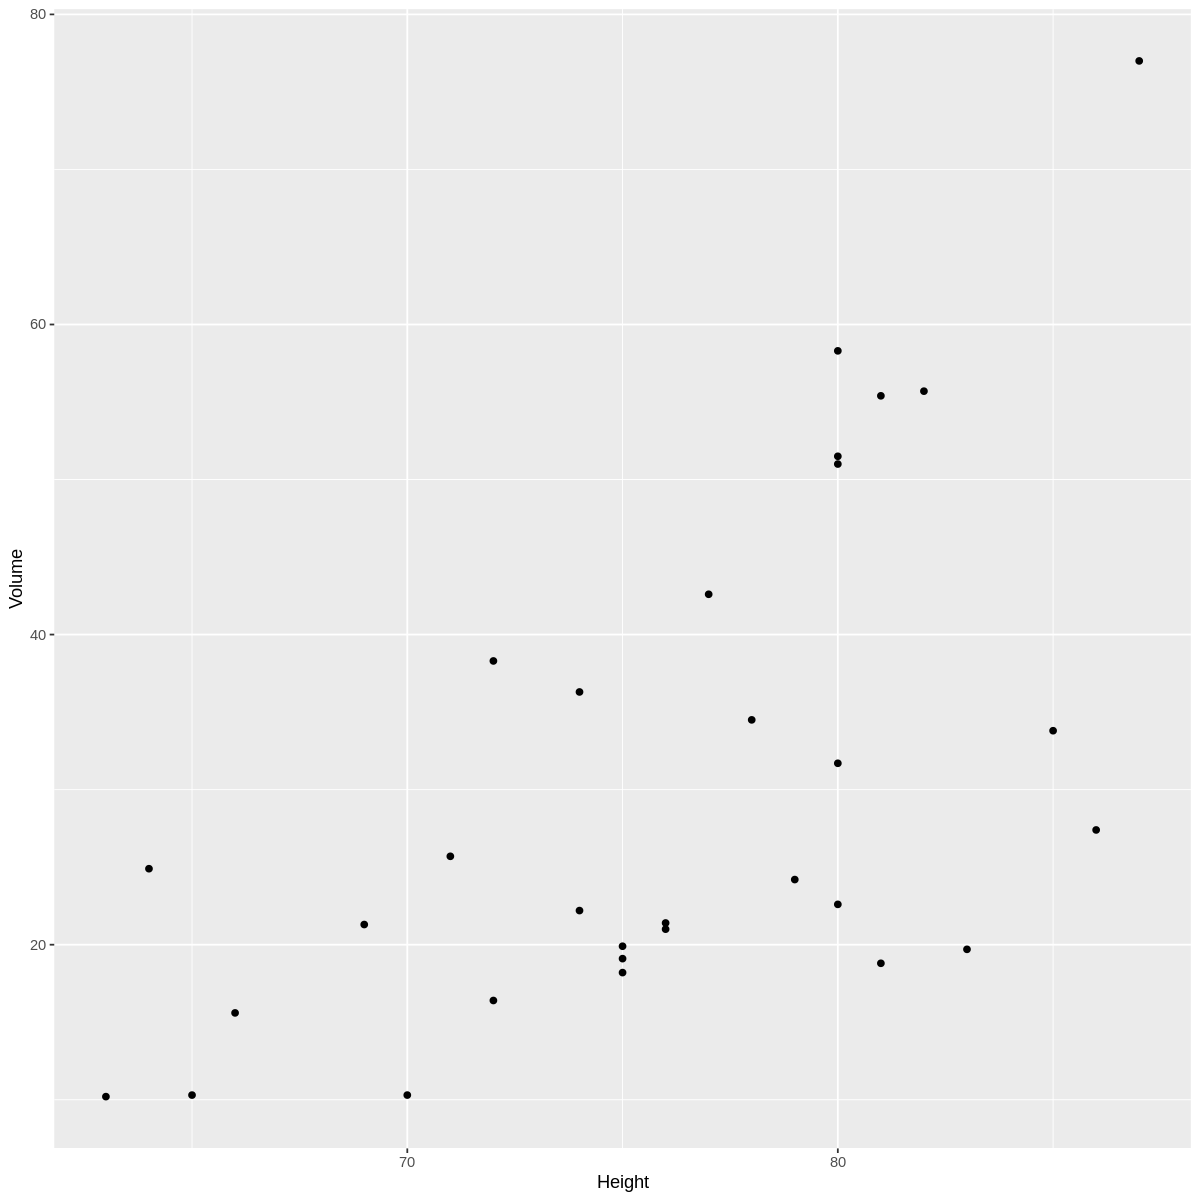

In [5]:
ggplot2::ggplot(dataframe,aes(x=Height, y=Volume)) +
    ggplot2::geom_point()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="YOpWo0c7-{Kv5fgkUT,{" x="-51" y="106"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="!I?6+@e{%Fg5wS`13zw!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="H4)le*X{cfhMs5b_M$8;"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d7W@SRx?r[z?ybM?W|TF"><field name="CODE">aes(x=Height, y=Volume)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="wQ53ik[w+P7D9sZBt2CF"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data></block></value></block></xml>

----------------------
**QUESTION:**

What is the measure of variability in the descriptive statistics?

**ANSWER: (click here to edit)**

*`std` which is standard deviation*

----------------------

**QUESTION:**

On this measure of variability, how are `Height` and `Volume` different, as shown on the plot?
Do you expect this to affect our model, since it is using `Height` to predict `Volume`?

**ANSWER: (click here to edit)**

*`Volume` has more variability than `Height`. This is not necessarily a big problem though it suggests that predictions based on `Height` will have larger residuals than might occur if `Height` and `Volume` were more evenly matched. We should be on the lookout for other possible problems with variance though.*


----------------------



**QUESTION:**

Imagine you had to draw a line through these points. 
Look at where it would go on the left side of the graph, then look at where it would go on the right side.
Are you as confident about one side as the other? 
Why or why not?

**ANSWER: (click here to edit)**

*Because the points spread out on the right hand side but are fairly tightly clustered on the left, I'm more confident about the left hand side than the right hand side.*


----------------------

## Model

Next create a simple linear regression model to predict `Volume` from `Height`.

Start by `parsnip` and `generics` so we can create a model and fit it.

In [6]:
library(parsnip)
library(generics)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable></variables><block type="import_R" id="Tkh?^4ccrGs0mL!EM3hu" x="-101" y="-34"><field name="libraryName" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><next><block type="import_R" id=".Hs/97T-2cD7?pjtke5p"><field name="libraryName" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field></block></next></block></xml>

Warning message:
“package ‘parsnip’ was built under R version 4.2.2”

Attaching package: ‘generics’


The following object is masked from ‘package:dplyr’:

    explain


The following objects are masked from ‘package:base’:

    as.difftime, as.factor, as.ordered, intersect, is.element, setdiff,
    setequal, union




Create and fit the model.

In [7]:
model = parsnip::linear_reg() %>%
    parsnip::set_mode("regression") %>%
    parsnip::set_engine("lm") %>%
    parsnip::fit.model_spec(Volume ~ Height,data = dataframe)

model

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable></variables><block type="variables_set" id="*(u89h_-M@(PB-!qP/1l" x="-94" y="176"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field><value name="VALUE"><block type="pipe_R" id="Oj1:/l+xksT^dSM;w{,g"><mutation items="3"></mutation><value name="INPUT"><block type="varDoMethod_R" id="m!?PwvZD%AJHhH1paJ[8"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">linear_reg</field><data>parsnip:linear_reg</data></block></value><value name="ADD0"><block type="varDoMethod_R" id="ady`8N}J*2BV_*AmtF`n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_mode</field><data>parsnip:set_mode</data><value name="ADD0"><block type="text" id="#4#x{=R9!%aA:_,cHnF("><field name="TEXT">regression</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="bybPF(gahfhB3cmyy;/n"><mutation items="1"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">set_engine</field><data>parsnip:set_engine</data><value name="ADD0"><block type="text" id="v9=Ry*6UUQjzFr5Sy@,f"><field name="TEXT">lm</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="Q61XWF.0ty]Aw^i83YUS"><mutation items="2"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">fit.model_spec</field><data>parsnip:fit.model_spec</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="n(du-Q]_KTwoCFj6n|V5"><field name="CODE">Volume ~ Height</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="lIU{_ql0epb7NH-C6Kvw"><field name="CODE">data = dataframe</field></block></value></block></value></block></value></block><block type="variables_get" id="_7UQK3CR!~7lS-}[]4VA" x="-111" y="447"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></xml>

parsnip model object


Call:
stats::lm(formula = Volume ~ Height, data = data)

Coefficients:
(Intercept)       Height  
    -87.124        1.543  


### Model predictions

Use the regression model to predict `Volume` using the minimum `Height` and the maximum `Height`.

In [8]:
parsnip::predict.model_fit(model,base::data.frame(Height= (unlist(list(63, 87), use.names = FALSE))))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="3q]Js%*Alzd]|p|FOe}-">parsnip</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="varDoMethod_R" id="rgELn|%xOZ~Fo0ALiqs@" x="-59" y="232"><mutation items="2"></mutation><field name="VAR" id="3q]Js%*Alzd]|p|FOe}-">parsnip</field><field name="MEMBER">predict.model_fit</field><data>parsnip:predict.model_fit</data><value name="ADD0"><block type="variables_get" id="NL]/9TiP_5#(wWR[u+Ha"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value><value name="ADD1"><block type="varDoMethod_R" id="IN27EgE5d195`/Y=V*kv"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">data.frame</field><data>base:data.frame</data><value name="ADD0"><block type="valueOutputCodeBlock_R" id="Y/{3Gptb|.8B[81KGX8r"><field name="CODE">Height=</field><value name="INPUT"><block type="unlistBlock_R" id="$F-+3Co@i%=7Ka2!oEKh"><value name="LIST"><block type="lists_create_with" id="RS;qg9H!$rimpd}X/EH/"><mutation items="2"></mutation><value name="ADD0"><block type="math_number" id="y0T/PA,E]%J$pXU1`U^t"><field name="NUM">63</field></block></value><value name="ADD1"><block type="math_number" id="E)/we*sLzq+i0gZmpB6-"><field name="NUM">87</field></block></value></block></value></block></value></block></value></block></value></block></xml>

.pred
<dbl>
10.10742
47.14782


----------------------

**QUESTION:**

How similar is your min for `Volume` to the min in the descriptive statistics?
How similar is your max for `Volume` to the max in the descriptive statistics?
What could be the reason for the difference?

**ANSWER: (click here to edit)**

*The min is very close to the observed min, but the max is pretty different. This is probably because there is so much spread on the right (the higher values of `Height`) that we can't fit a good line to it.*

----------------------

Make a new dataframe with a column of predictions.

In [9]:
data_evaluation = generics::augment(model,dataframe)

data_evaluation

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable><variable id="w(9-o9gLSDEJ,]Qt}e!^">generics</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="variables_set" id="qHR/^ulVJ-n)W4{:7-@Y" x="-193" y="204"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field><value name="VALUE"><block type="varDoMethod_R" id="k:ygkKz,swERp]34_uH{"><mutation items="2"></mutation><field name="VAR" id="w(9-o9gLSDEJ,]Qt}e!^">generics</field><field name="MEMBER">augment</field><data>generics:augment</data><value name="ADD0"><block type="variables_get" id="9A!7aBLNe1]IufZ-R;BY"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value><value name="ADD1"><block type="variables_get" id="qPW(v;lbSJ=RJ)y;hW$)"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value></block><block type="variables_get" id="Um|1+kaS%|p}e=,Pw)MQ" x="-203" y="317"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></xml>

Girth,Height,Volume,.pred,.resid
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
8.3,70,10.3,20.91087,-10.61086922
8.6,65,10.3,13.19412,-2.89412045
8.8,63,10.2,10.10742,0.09257906
10.5,72,16.4,23.99757,-7.59756873
10.7,81,18.8,37.88772,-19.08771651
⋮,⋮,⋮,⋮,⋮
17.5,82,55.7,39.43107,16.26893
17.9,80,58.3,36.34437,21.95563
18.0,80,51.5,36.34437,15.15563


Create a new figure with the raw data and predictions together.

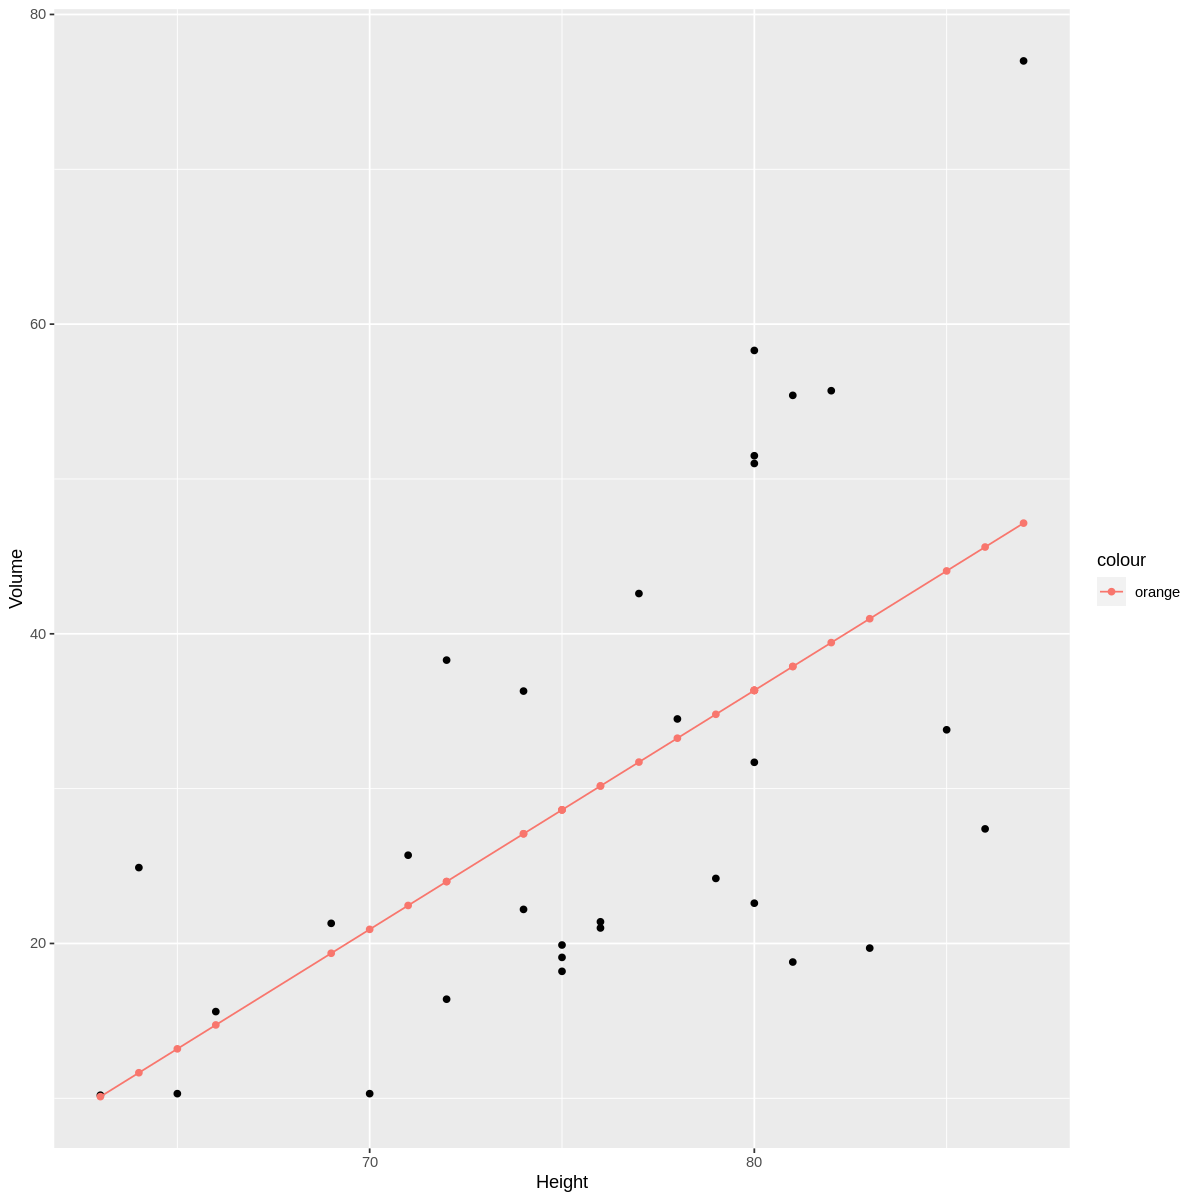

In [10]:
ggplot2::ggplot(data_evaluation,aes(x=Height)) +
    ggplot2::geom_point(aes(y=Volume)) +
    ggplot2::geom_point(aes(y=.pred,color="orange")) +
    ggplot2::geom_line(aes(y=.pred,color="orange"))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</variable></variables><block type="ggplot_plus_R" id="YOpWo0c7-{Kv5fgkUT,{" x="-51" y="106"><mutation items="3"></mutation><value name="INPUT"><block type="varDoMethod_R" id="!I?6+@e{%Fg5wS`13zw!"><mutation items="2"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="H4)le*X{cfhMs5b_M$8;"><field name="VAR" id=".zA6Y6Y}9T^S|whSl]|6">data_evaluation</field></block></value><value name="ADD1"><block type="dummyOutputCodeBlock_R" id="d7W@SRx?r[z?ybM?W|TF"><field name="CODE">aes(x=Height)</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="wQ53ik[w+P7D9sZBt2CF"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="@7#PJ.BelB8-Z~6[4;/$"><field name="CODE">aes(y=Volume)</field></block></value></block></value><value name="ADD1"><block type="varDoMethod_R" id="!ZJvCY~j[3FC|^K_@*x#"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_point</field><data>ggplot2:geom_point</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="~spE:=_IgN1sxf7YkiaT"><field name="CODE">aes(y=.pred,color="orange")</field></block></value></block></value><value name="ADD2"><block type="varDoMethod_R" id="]~}!5gwr:A96yY@,@D.s"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_line</field><data>ggplot2:geom_line</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="1?N-81I1I{?^Aq9OD$Yt"><field name="CODE">aes(y=.pred,color="orange")</field></block></value></block></value></block></xml>

----------------------

**QUESTION:**

What do you think the residuals will be towards the right (where `Height` is larger) vs. the left?

**ANSWER: (click here to edit)**

*Residuals will be larger on the right.*

----------------------

## Checking the Model Fit

Load `ggfortify`.

In [11]:
library(ggfortify)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="tf(leE=z8{GT1?Sd7e|U">ggfortify</variable></variables><block type="import_R" id="{a@kEnYPhSWh19~lkOXv" x="-187" y="-24"><field name="libraryName" id="tf(leE=z8{GT1?Sd7e|U">ggfortify</field></block></xml>

Warning message:
“package ‘ggfortify’ was built under R version 4.2.2”
Registered S3 method overwritten by 'ggfortify':
  method          from   
  autoplot.glmnet parsnip



Plot:

- `Height` vs. residuals to see if the residuals are evenly above and below 0

- Predictions vs. residuals to check constant variance

- A QQ plot to check normality of the residuals

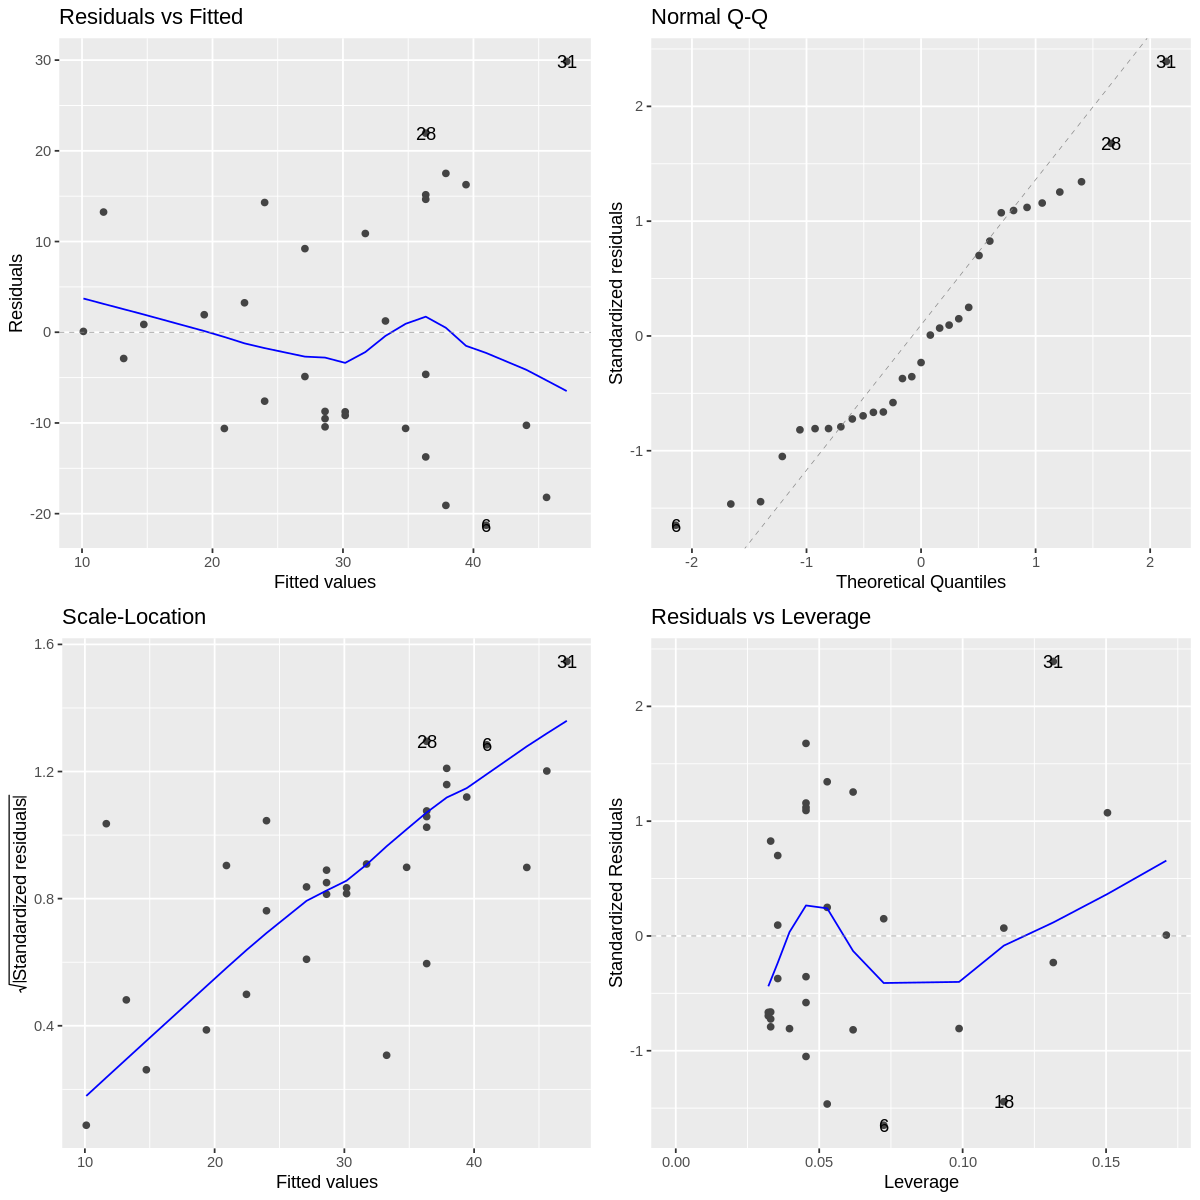

In [12]:
ggplot2::autoplot(model)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable></variables><block type="varDoMethod_R" id="eH5:NQO]BK?da)P[H/+C" x="-195" y="142"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">autoplot</field><data>ggplot2:autoplot</data><value name="ADD0"><block type="variables_get" id="LUo2Mn#hqnZF|FAqspQF"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value></block></xml>

----------------------

**QUESTION:**

Are the residuals evenly around 0 across values for `Height`?

**ANSWER: (click here to edit)**

*No, residuals are bigger when `Height` is bigger*

----------------------

**QUESTION:**

Are the residuals evenly around 0 for different values of `predictions`?

**ANSWER: (click here to edit)**

*No, the pattern is identical to the previous scatterplot.*

----------------------

**QUESTION:**

Are the residuals close to a straight line?

**ANSWER: (click here to edit)**

*Mostly.*


----------------------


Load `hardhat`.

In [13]:
library(hardhat)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable></variables><block type="import_R" id="}Vv(_dZs:x?boA6a.1^N" x="-187" y="-24"><field name="libraryName" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field></block></xml>

Finally, print the coefficient of determination, $r^2$, for the model.

In [14]:
model %>%
    hardhat::extract_fit_engine() %>%
    base::summary()

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="mgo;O)iX^5)A5.@gqIkA">model</variable><variable id="{5PU6CE0j[[^yJ79kBMR">hardhat</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="pipe_R" id="_?zCt{QEC?tfj3H]HtAu" x="-112" y="162"><mutation items="2"></mutation><value name="INPUT"><block type="variables_get" id="OI3EYMFqtCofk(0Ma~i+"><field name="VAR" id="mgo;O)iX^5)A5.@gqIkA">model</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="biD^sO]L`.ULKGnJ7EfO"><mutation items="1"></mutation><field name="VAR" id="{5PU6CE0j[[^yJ79kBMR">hardhat</field><field name="MEMBER">extract_fit_engine</field><data>hardhat:extract_fit_engine</data></block></value><value name="ADD1"><block type="varDoMethod_R" id="4ulNX*c7V_BV8hyrFBTr"><mutation items="1"></mutation><field name="VAR" id="6C!l+@S8,SvtzakmsxQD">base</field><field name="MEMBER">summary</field><data>base:summary</data></block></value></block></xml>


Call:
stats::lm(formula = Volume ~ Height, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-21.274  -9.894  -2.894  12.068  29.852 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -87.1236    29.2731  -2.976 0.005835 ** 
Height        1.5433     0.3839   4.021 0.000378 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 13.4 on 29 degrees of freedom
Multiple R-squared:  0.3579,	Adjusted R-squared:  0.3358 
F-statistic: 16.16 on 1 and 29 DF,  p-value: 0.0003784


## Overall evaluation

**QUESTION:**

What are the problems with this model?

**ANSWER: (click here to edit)**

*The primary problem is uneven variance. This is manifesting in the diagnostic scatterplots and the low $r^2$. The QQ plot is mostly OK.*


----------------------

**QUESTION:**

Can we ever "trust" this model's predictions?
When?

**ANSWER: (click here to edit)**

*We can trust the predictions for lower values of `Height`. For higher values, the model is not very accurate.*

----------------------

<!--  -->